In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import math
import tensorflow as tf
print(tf.__version__)

%matplotlib inline

1.0.1


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print(type(mnist))

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>


In [4]:
print(type(mnist.train.images), mnist.train.images.shape)
print(type(mnist.train.labels), mnist.train.labels.shape)

<class 'numpy.ndarray'> (55000, 784)
<class 'numpy.ndarray'> (55000, 10)


In [5]:
print(mnist.train.images[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [6]:
print(mnist.train.labels[0])

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


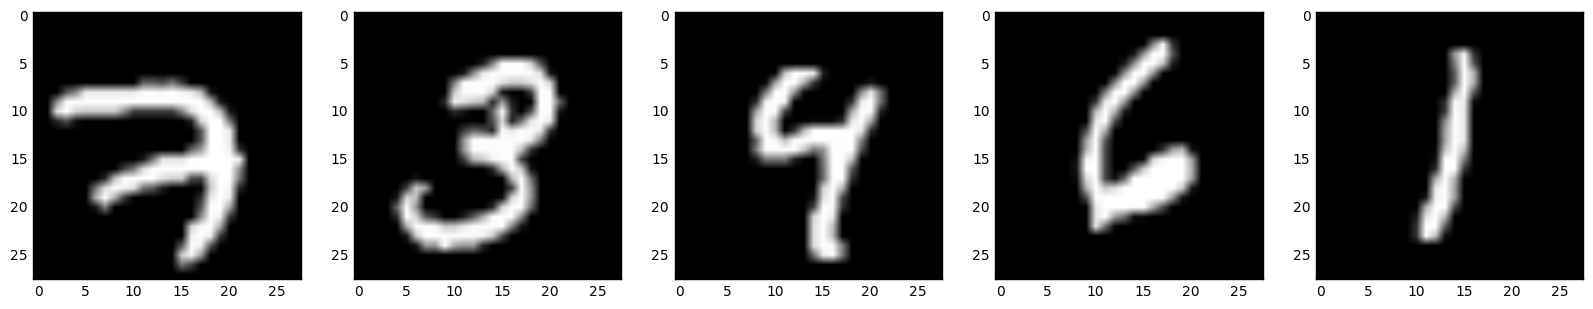

In [7]:
fig = plt.figure(figsize=(20, 5))
for i in range(5):
    img = mnist.train.images[i] # 기존 코드에서 array 할 필요가 없다.
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img, cmap='gray')

In [8]:
print(mnist.train.labels[1])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [9]:
print(mnist.train.labels[2])

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


In [10]:
print(mnist.train.labels[3])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [11]:
print(type(mnist.validation.images), mnist.validation.images.shape)
print(type(mnist.validation.labels), mnist.validation.labels.shape)

<class 'numpy.ndarray'> (5000, 784)
<class 'numpy.ndarray'> (5000, 10)


In [12]:
print(type(mnist.test.images), mnist.test.images.shape)
print(type(mnist.test.labels), mnist.test.labels.shape)

<class 'numpy.ndarray'> (10000, 784)
<class 'numpy.ndarray'> (10000, 10)


In [13]:
x = tf.placeholder(tf.float32, [None, 784]) # placeholder : 텐서 저장 장소를 만듦
print("x -", x.get_shape())

x - (?, 784)


In [14]:
y_target = tf.placeholder(tf.float32, [None, 10])
print("x -", y_target.get_shape())

x - (?, 10)


In [15]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
print("W -", W.get_shape())
print("b -", b.get_shape())

W - (784, 10)
b - (10,)


In [16]:
u = tf.matmul(x, W) + b # x,W 위치 중요!
print("u -", u.get_shape())

u - (?, 10)


In [17]:
learning_rate = 0.05
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

Total batch: 550
Epoch:  0, Train Error: 2.30271, Validation Error: 2.30257, Test Accuracy: 0.09800
Epoch:  1, Train Error: 0.45268, Validation Error: 0.43121, Test Accuracy: 0.88920
Epoch:  2, Train Error: 0.38811, Validation Error: 0.36653, Test Accuracy: 0.90270
Epoch:  3, Train Error: 0.36072, Validation Error: 0.33986, Test Accuracy: 0.90790
Epoch:  4, Train Error: 0.34385, Validation Error: 0.32456, Test Accuracy: 0.91120
Epoch:  5, Train Error: 0.33321, Validation Error: 0.31494, Test Accuracy: 0.91290
Epoch:  6, Train Error: 0.32423, Validation Error: 0.30666, Test Accuracy: 0.91600
Epoch:  7, Train Error: 0.31751, Validation Error: 0.30055, Test Accuracy: 0.91700
Epoch:  8, Train Error: 0.31309, Validation Error: 0.29703, Test Accuracy: 0.91780
Epoch:  9, Train Error: 0.30762, Validation Error: 0.29185, Test Accuracy: 0.91850
Epoch: 10, Train Error: 0.30414, Validation Error: 0.28880, Test Accuracy: 0.91910
Epoch: 11, Train Error: 0.30111, Validation Error: 0.28654, Test Accur

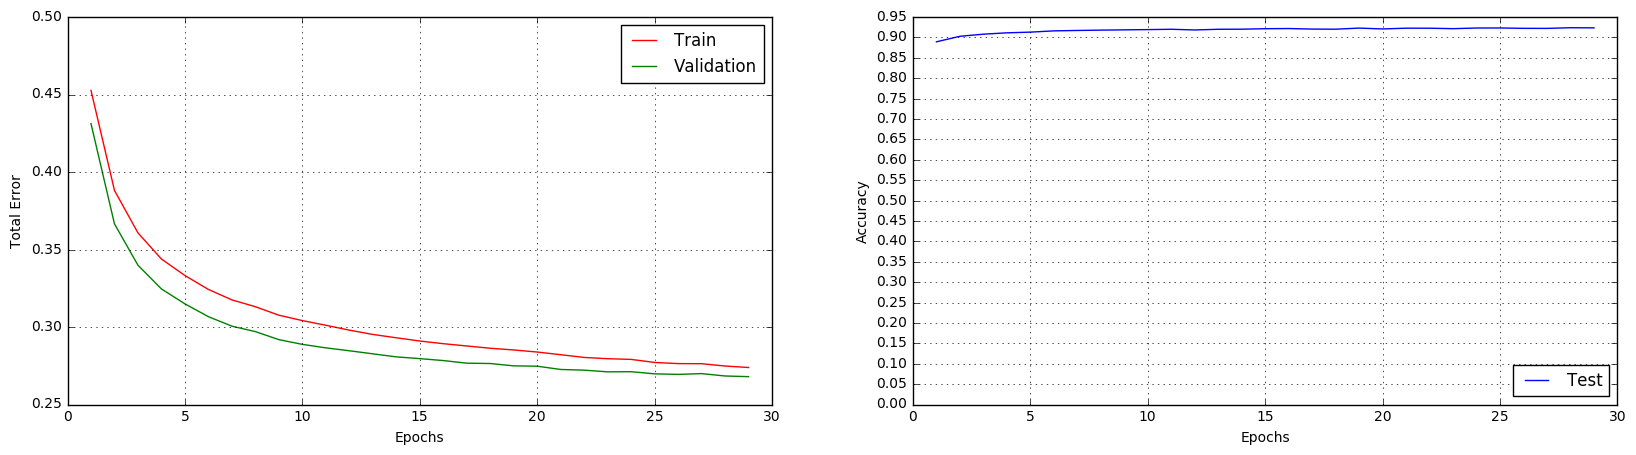

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
Number of False Prediction: 767
False Prediction Index: 8, Prediction: 6, Ground Truth: 5
False Prediction Index: 33, Prediction: 6, Ground Truth: 4
False Prediction Index: 63, Prediction: 2, Ground Truth: 3
False Prediction Index: 66, Prediction: 7, Ground Truth: 6
False Prediction Index: 92, Prediction: 4, Ground Truth: 9


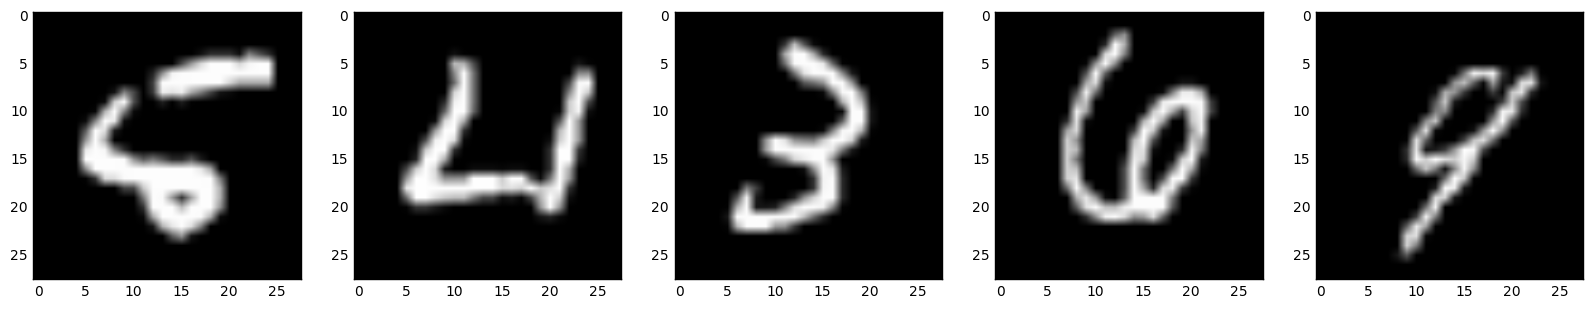

In [18]:
prediction_and_ground_truth = tf.equal(tf.argmax(u, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

def draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list):
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction(diff_index_list):
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(mnist.test.images[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')
    
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    batch_size = 100
    total_batch = int(math.ceil(mnist.train.num_examples/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    training_epochs = 30
    epoch_list = []
    train_error_list = []
    validation_error_list = []
    test_accuracy_list = []
    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: mnist.train.images, y_target: mnist.train.labels})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: mnist.validation.images, y_target: mnist.validation.labels})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: mnist.test.images, y_target: mnist.test.labels})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list)
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u, 1), feed_dict={x:mnist.test.images})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:mnist.test.labels})

    print(prediction)
    print(ground_truth)

    diff_index_list = []
    for i in range(mnist.test.num_examples):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    draw_false_prediction(diff_index_list)